<a href="https://colab.research.google.com/github/WihangaChethiya/ML_Projects/blob/main/Build_a_Deep_CNN_Image_Classifier_with_ANY_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Install Dependencies and Setup
import tensorflow as tf
import os

import cv2
import imghdr # Check the image extention

from matplotlib import pyplot as plt
import numpy as np

In [12]:
data_dir = '/content/drive/MyDrive/Nicholas_Projects/Data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [14]:
# Every single image in sub folder
# os.listdir(data_dir)
os.listdir(os.path.join(data_dir,'Happy'))

['360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '35438_hd.jpg',
 '24px.svg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '1920px-face-smile.svg_.png',
 '170404-happy-workers-feature.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '1000_F_38064890_H0vhLXPugCMaxRnEzXtASpmml1NKhqrp.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '05-12-21-happy-people.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 'A_Sep20_14_1189155141.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976~mv2.png',
 '960x0.jpg',
 '56f455011e0000b300705475.jpeg',
 'al-icon.png',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 'download (12).jpg',
 'download (11).png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 'done_black_16dp.png',
 'depositphotos_317939792

In [15]:
for image_class in os.listdir(data_dir):
    print(image_class)

Sad
Happy


In [16]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

24px.jpeg
1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpeg
240_F_671059717_OAlmXdOfyZiunLuzQqCjZ4FBwa0NZCel.jpeg
141203-depression-stock.jpeg
1000_F_584080922_GDrrJBOpwC2AOvbDIdPfPcxEF0RrTRgk.jpeg
checkmark.jpeg
checkmark2.jpeg
b2ap3_large_happy-sad-unsplash-850x575.jpeg
AF2bZygZnZQxzeQ67EVNNw_BxplWs7Wz9IS18KVJHr3pZYOzwhc=s32-c-mo.jpeg
960x0.jpeg
495-4959228_desperation-sad-person-silhouette-png-transparent-png.jpeg
7-Things-You-Should-Not-Say-to-a-Depressed-Friend-960x640.jpeg
39843138-sad-man.jpeg
al-icon.jpeg
353397713.jpeg
3293803510_e96c37cc3e_z1.jpeg
323277256.jpeg
2774670-sad-business-man-and-black-worker-portrait-of-depressed-face-with-sadness-from-work.-png-background-isolated-and-professional-model-person-disappointed-of-corporate-job-fail-or-mi.jpeg
depositphotos_36254119-stock-photo-desperate-sad-people.jpeg
Depression-Vs-Sadness-Are-You-Just-Sad-Or-Depressed-2020-960x640.jpeg
depression-sad-mood-sorrow-dark-people-wallpaper-7.jpeg
DealingwithDepression

In [23]:
img = cv2.imread(os.path.join(data_dir, 'Happy', '_happy_jumping_on_beach-40815.jpg')) # Gives Numpy array
img.shape

(800, 1528, 3)

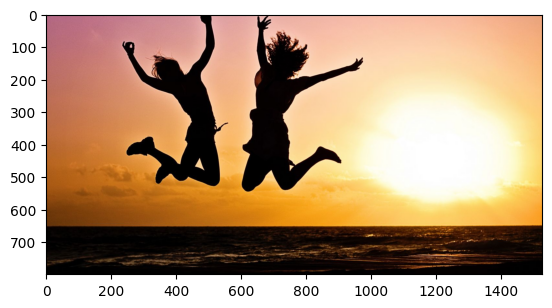

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)

        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/drive/MyDrive/Nicholas_Projects/Data/Happy/24px.svg
Image not in ext list /content/drive/MyDrive/Nicholas_Projects/Data/Happy/depositphotos_317939792-stock-photo-young-woman-isolated-yellow-background.jpg
Image not in ext list /content/drive/MyDrive/Nicholas_Projects/Data/Happy/depositphotos_208447156-stock-photo-young-happy-people-have-fun.jpg
Image not in ext list /content/drive/MyDrive/Nicholas_Projects/Data/Happy/depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in ext list /content/drive/MyDrive/Nicholas_Projects/Data/Happy/desktop_searchbox_sprites318_hr.webp
Image not in ext list /content/drive/MyDrive/Nicholas_Projects/Data/Happy/download (11).svg
Image not in ext list /content/drive/MyDrive/Nicholas_Projects/Data/Happy/download (10).svg
Image not in ext list /content/drive/MyDrive/Nicholas_Projects/Data/Happy/download (1).svg
Image not in ext list /content/drive/MyDrive/Nicholas_Projects/Data/Happy/downlo

# **Load DATA**

In [34]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
# deafult batch size 32

Found 294 files belonging to 2 classes.


In [30]:
# data walata acsess krnw
data_iterator = data.as_numpy_iterator()
data_iterator

In [40]:
# data walata acsess krl mewge thani ewtt acsess krnw wge idea ekak
batch = data_iterator.next()

In [41]:
# Image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [45]:
# SAD = 1
# Happy = 0
batch[1] # labels

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

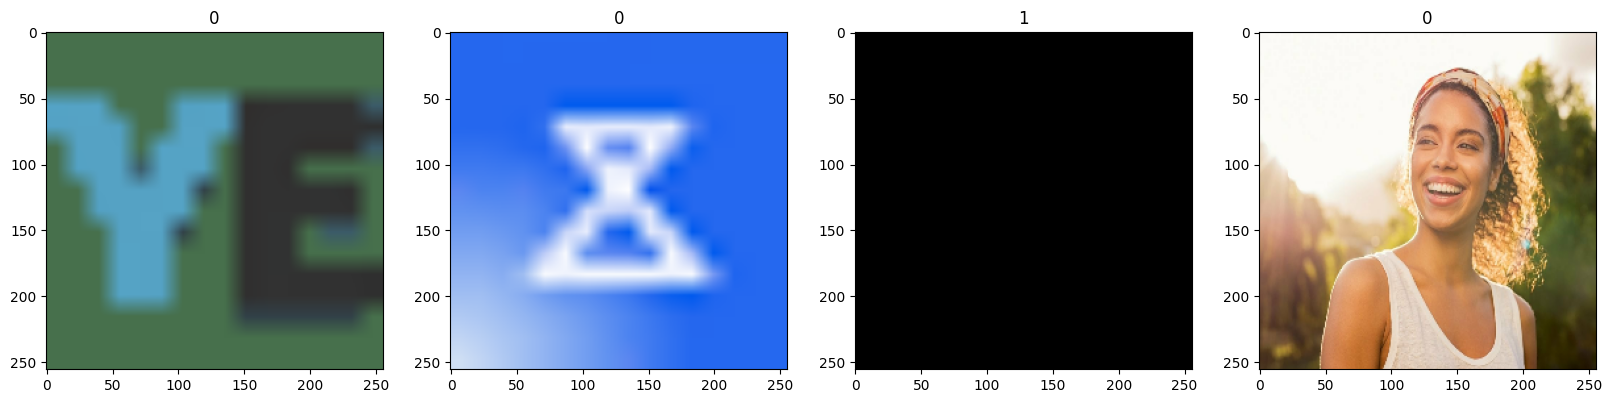

In [46]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprossesing Data

**Scale Data**

In [ ]:
data = data.map(lambda x,y: (x/255, y)) # In batch we have